In [93]:
%run ~/dev/pydev/Jupyter/ml/settings.ipynb
import autograd.numpy as np  
from mpl_toolkits import mplot3d

### Coordinate search and Coordinate descent

In [94]:
#Minimizing f = x**2 + y**2
#Or Zero-order 
cost = lambda x, y: 2.*x + 2.*y
f = lambda x, y : x**2 +y**2
def coordinate_search(cost_function, initial_w, N_coordinates=1, maxmum_steps=10, step_length=1., diminishing=False):
    w0 = initial_w
    apply_cost = lambda w: cost_function(*[arg for arg in w])
    cost = apply_cost(w0)
    #
    w_hist=[w0]
    cost_hist=[cost]
    for n in range(1, maxmum_steps+1):
        if diminishing is True:
            alpha = step_length/n
        else :
            alpha = step_length
        diff = alpha*step_length
        ws = [[w0[n] + diff, w0[n] - diff] for n in range(N_coordinates)]
        candidates = np.array(np.meshgrid(*ws), dtype=float).T.reshape(-1, N_coordinates)
        x = [candidates[:,n] for n in range(N_coordinates)]
        min_direction_idx = np.argmin(np.abs(list(map(cost_function, *x))))
        w0 = candidates[min_direction_idx]
        #
        w_hist.append(w0)
        cost_hist.append(apply_cost(w0))
        #
    return w0,w_hist,cost_hist

In [95]:
Nit=30
w0, w_hist, cost_hist = coordinate_search(f, [5,2], 2, Nit, .5, False)

Text(0, 0.5, 'Cost')

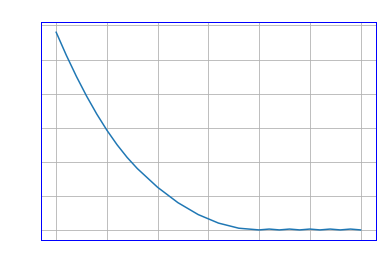

In [96]:
plt.plot(list(np.arange(Nit+1)), cost_hist)
plt.grid()
# Legend the plot
plt.title("Ordinate Search algorithm", color='white')
plt.xlabel("N iteration")
plt.ylabel("Cost")

In [97]:
w0

array([0., 0.])

In [98]:
#Iterate only one coordinate at one time 
def coordinate_descent(cost_function, initial_w, N_coordinates=1, maxmum_steps=10, step_length=1., diminishing=False):
    w0 = initial_w
    apply_cost = lambda w: cost_function(*[arg for arg in w])
    cost = apply_cost(w0)
    #
    w_hist=[w0]
    cost_hist=[cost]
    for n in range(1, maxmum_steps+1):
        if diminishing is True:
            alpha = step_length/n
        else :
            alpha = step_length
        diff = alpha*step_length
        
        for N in range(N_coordinates):
            ws = [w0[N] + diff, w0[N] - diff]
            candidates = []
            for new_w in ws:
                c = w0.copy()
                c[N] = new_w
                candidates.append(c)
            candidates = np.array(candidates)
            x = [candidates[:,n] for n in range(N_coordinates)]
            min_direction_idx = np.argmin(np.abs(list(map(cost_function, *x))))
            w0 = candidates[min_direction_idx]
            #
            w_hist.append(w0)
            cost_hist.append(apply_cost(w0))
            #
            
    return w0,w_hist,cost_hist

In [99]:
Nit=30
w0, w_hist, cost_hist = coordinate_descent(f, [5,2], 2, Nit, .5, False)

Text(0, 0.5, 'Cost')

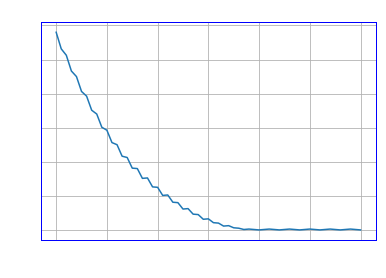

In [100]:
plt.plot(list(np.arange(Nit*2+1)), cost_hist)
plt.grid()
# Legend the plot
plt.title("Ordinate Search algorithm", color='white')
plt.xlabel("N iteration")
plt.ylabel("Cost")

### Using Autograd

In [101]:
from autograd import grad 
g = lambda w: np.tanh(w)
dgdw = grad(g)
import toolz
split_f = lambda x: [x[:,n] for n in np.arange(x.shape[1])]
pair_f = lambda f, params, mim_, max_, N: np.array([[j, *[fi(j, *ps) if len(ps) is not 0 else fi(j) for fi, ps in zip(f, params)]] for j in np.linspace(mim_, max_, N)])
data_f = toolz.compose(split_f, pair_f)

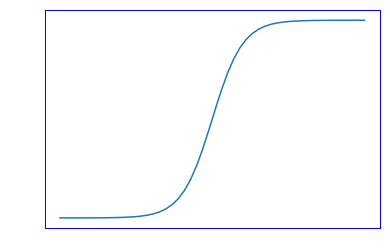

In [102]:
plt.plot(*data_f([g],[[]],-5,5,50))

Computing Dradient(of tanh) with Autograd: Orange curve

In [103]:
#plot_friendly(np.array(data_f([g, dgdw, grad(dgdw)], [[],[],[]], -5,5,50)))

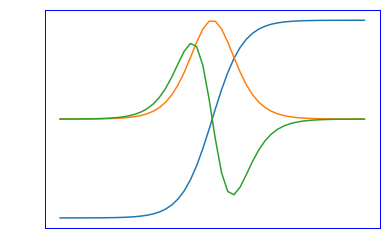

In [104]:
# Just transforms from [x, y1, y2, y3] to [[x, y1], [x, y2], [x, y3]] to [[x, y1, x, y2, x, y3]
plot_friendly = lambda x: (lambda r: r.reshape(r.shape[0]*r.shape[1], r.shape[2]))(np.array([[x[0], x[n+1]] for n in np.arange(x.T.shape[1]-1)]))
plt.plot(*plot_friendly(np.array(data_f([g, dgdw, grad(dgdw)], [[],[],[]], -5,5,50))))

https://github.com/vega/vega/wiki/Scales#scale-range-literals

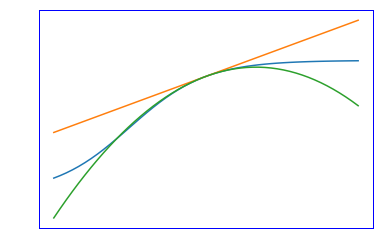

In [105]:
from cycler import cycler
vega_cat10= ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf']
#new_prop_cycle = (cycler('color', ['b', 'r', 'g']) + cycler('lw',[1, 2, 3]) + cycler(linestyle=['-', '--', '-.'])) #or 
#new_prop_cycle = cycler(color='cmykbgr')
new_prop_cycle = (cycler('color', vega_cat10))
plt.rc('axes', prop_cycle=new_prop_cycle)
#
tylor_first_order_f = lambda w,w_0,g,dgdw: g(w_0) + dgdw([w_0])*(w - w_0)
tylor_second_order_f = lambda w,w_0,g,dgdw,dgdw2: g(w_0) + dgdw([w_0])*(w - w_0) + 0.5*dgdw2([w_0])*(w - w_0)**2
dgdw2 = grad(dgdw)
prors = [[],[1, g, dgdw],[1, g, dgdw, dgdw2]]
plt.plot(*plot_friendly(np.array(data_f([g,tylor_first_order_f,tylor_second_order_f], prors, -1.,3.,50))))

In [106]:
g = lambda w_1,w_2: np.tanh(w_1*w_2)

In [107]:
def set_3dplt(ax_, plt_):
    plt_.gca().patch.set_facecolor('None')
    ax_.w_xaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
    ax_.w_yaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
    ax_.w_zaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
axes_setting_ = {'facecolor' : 'None'}
mpl.rc('axes', **axes_setting_)

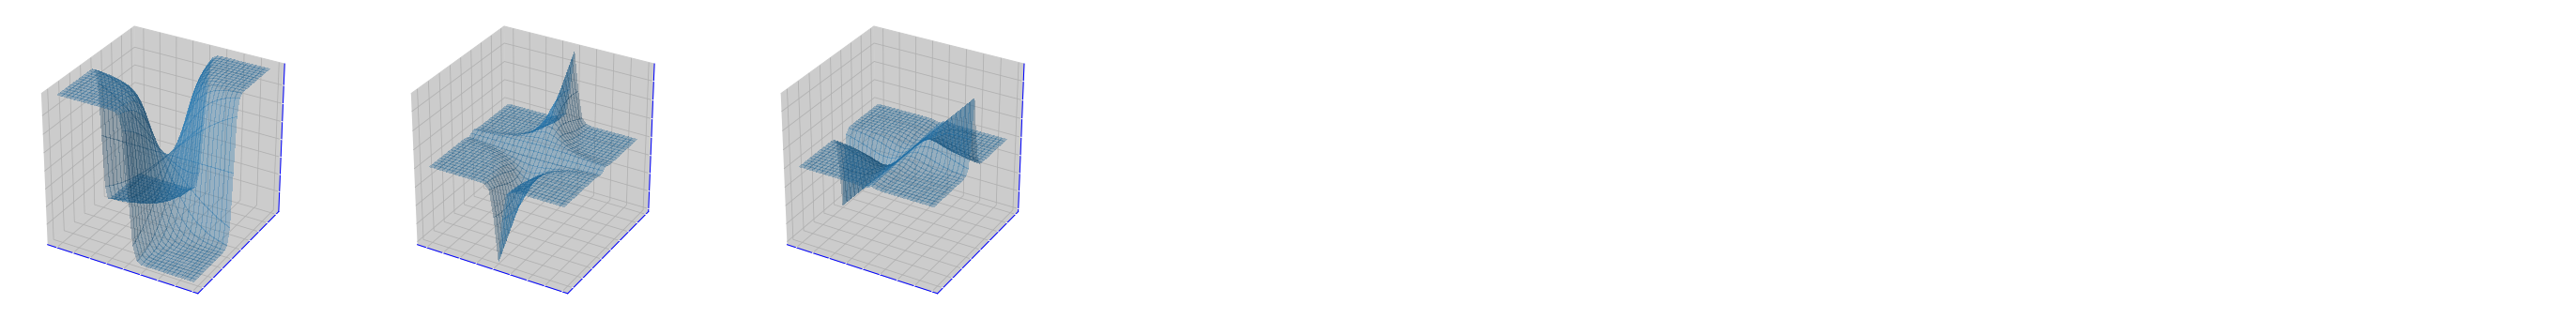

In [108]:
from autograd import elementwise_grad 
fig = plt.figure(figsize=(20, 6))
#ax = fig.gca(projection='3d')
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
#
a = np.arange(-4, 4, 0.25)
b = np.arange(-4, 4, 0.25)
a, b = np.meshgrid(a, b)
c = g(a,b)
dgdw1 = elementwise_grad(g,0)
dgdw2 = elementwise_grad(g,1)
set_plt = dict(rstride=1, cstride=1, alpha=0.3, 
               linewidth=0, antialiased=False)
ax1.plot_surface(a, b, c, **set_plt)
ax2.plot_surface(a, b, dgdw1(a,b), **set_plt)
ax3.plot_surface(a, b, dgdw2(a,b), **set_plt)
#
ax1.text2D(0.1, 0.95, "g", transform=ax1.transAxes, color='white', size =20)
ax2.text2D(0.1, 0.95, "partial derivative of first arg", transform=ax2.transAxes, color='white', size =20)
ax3.text2D(0.1, 0.95, "partial derivative of second arg", transform=ax3.transAxes, color='white', size =20)
for ax_ in [ax1, ax2, ax3]:
    set_3dplt(ax_, plt)

In [109]:
g_ = lambda w1,w2: np.tanh(w1*w2)
nabla_g = elementwise_grad(g_, (0,1))

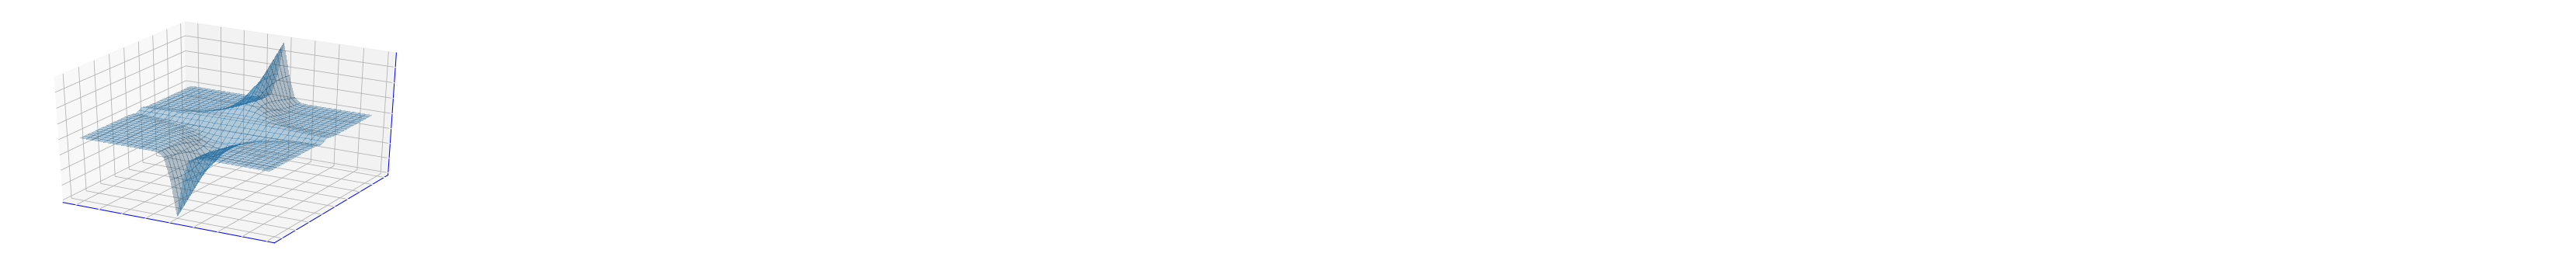

In [110]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
#
a = np.arange(-4, 4, 0.25)
b = np.arange(-4, 4, 0.25)
a, b = np.meshgrid(a, b)
c = nabla_g(a,b)
set_plt = dict(rstride=1, cstride=1, alpha=0.3, 
               linewidth=0, antialiased=False)
ax.plot_surface(a, b, np.array(c)[0], **set_plt)
#
ax.text2D(0.1, 0.95, "Culculating all parcial derivatives at once", transform=ax.transAxes, color='white', size =20)
set_3dplt(ax_, plt)

In [111]:
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w]           # container for weight history
    cost_history = [g(*w)]          # container for corresponding cost function history
    for k in range(max_its):
        # evaluate the gradient, store current weights and cost function value
        #print(w)
        grad_eval = gradient(*w)

        # take gradient descent step
        print(grad_eval)
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(*w))
    return weight_history,cost_history

This is the demonstration of descent gradient stack in the saddle point <br>
and can't find the global minimum.

11.84526000000001
2.225529932891443
1.4196958453789912
1.0094453675865922
0.7629824840259536
0.6005754821521563
0.48683264705300616
0.4035963616607757
0.34061181239305066
0.29167130181513934
0.25281266968728683
0.22139852512662858
0.19561208969671118
0.17416557297749247
0.15612372721847242
0.1407929975821084
0.12764961648698261
0.1162916535496517
0.10640625972798101
0.09774681016080049
0.09011665000789383
0.08335733848163225
0.07734001551481569
0.07195897333357916
0.06712680912443172
0.06277072753036028
0.05882969018363139
0.05525219665281104
0.05199454124308122
0.04901943206217127


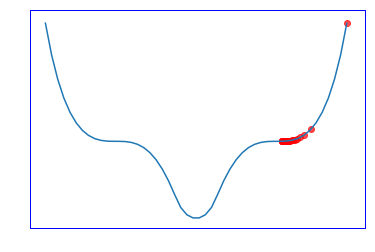

In [112]:
gg = lambda w: (np.maximum(0,(3*w - 2.3)**3 + 1))**2 + (np.maximum(0,(-3*w + .7)**3 + 1))**2
Nit=30
w_hist, cost_hist = gradient_descent(gg, .01, Nit, [1.])
plt.plot(*plot_friendly(np.array(data_f([gg], [[]], -0.,1.,50))))
plt.scatter(w_hist, gg(np.array(w_hist)), color='r', alpha=.7)

The problems of descent gradient are: first, zigzagging problem happens when the valley of is too narrow and can't go deeper. To fix this problem, we can apply small enoguh learning parameters, which is presented as alpha, however we will encounter the other problem, which is slow convergence. Because of small alpha, algorithm might even not find the mimimas at the end of iterations.

### Momentum accelerated gradient descent

In [113]:
axes_setting_ = {'facecolor' : 'white'}
mpl.rc('axes',**axes_setting_)

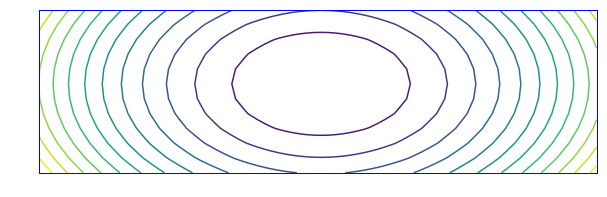

In [174]:
import matplotlib
delta = 0.25
x = np.arange(-10., 10., delta)
y = np.arange(-1.5, 1.5, delta)
X, Y = np.meshgrid(x, y)
#Z = lambda w,a,b,c: a + b.T.dot(w) #+ w.T.dot(c).dot(w)
"""Z = lambda w,a,b,c: a + b[0]*w[0] + b[1]*w[1] + c[0]*(w[0]**2) + c[1]*(w[1]**2)
a = .1
b = np.zeros(2)
c1 = np.array([.02,10])"""
#Z = lambda w1,w2: (w1+2*w2-7)**2 + (2*w1+w2-5)**2 
#Z = lambda w1,w2: w1**2 + 16*(w2**2)
Z = lambda w,c: np.multiply(w.T.dot(c), w.T)

#fig, ax = plt.subplots(figsize=(15, 3))
#Z_ = Z(X.ravel(), Y.ravel())
c = np.array([[1,0.],[0.,13.]])
Z_ = Z(np.vstack((X.ravel(), Y.ravel())),c)
Z_ = np.array([z[0]+z[1] for z in Z_])
##
levels = np.arange(-Z_.min(),Z_.max(),10)
fig, ax = plt.subplots(figsize=(10, 3))
normalize=matplotlib.colors.Normalize(vmin=None, vmax=None, clip=False)
CS = ax.contour(X, Y, Z_.reshape(X.shape), norm=normalize, levels=levels)
#alpha=.8
#max_its=20
#w=[5.,1.]
#w_hist, cost_hist= gradient_descent(Z,alpha,max_its,w);w_hist, cost_hist
#w_hist = np.array(w_hist)
#plt.scatter(w_hist[:,0],w_hist[:,1])